In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
x=df.drop('Drug',axis=1)
y=df['Drug']


In [ ]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
x=pd.get_dummies(x)

In [ ]:
x.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [ ]:
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
modelLR=LR.fit(X_train,Y_train)
y_pred_lr=modelLR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score=",accuracy_score(Y_test,y_pred_lr))

Accuracy Score= 0.975


In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


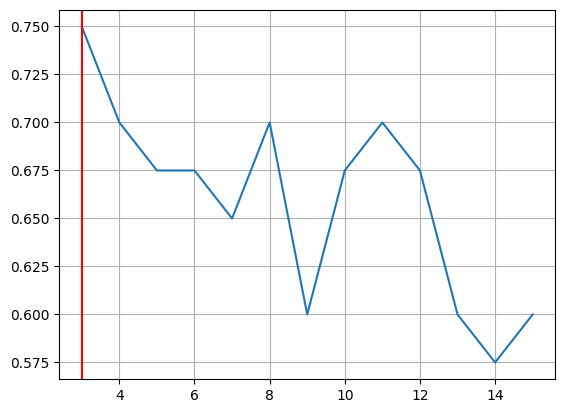

In [ ]:
metric=[]
neighbour=np.arange(3,16)
for k in neighbour:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  y_knn_pred=knn.predict(X_test)
  acc=accuracy_score(Y_test,y_knn_pred)
  metric.append(acc)
plt.plot(neighbour,metric)
plt.axvline(x=3,color='r')
plt.grid()
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_knn_pred=knn.predict(X_test)

In [ ]:
print("Accuracy Score=",accuracy_score(Y_test,y_knn_pred))

Accuracy Score= 0.75


In [ ]:
#svm
from sklearn.svm import SVC
svc=SVC(kernel='linear')
model_svc=svc.fit(X_train,Y_train)
y_pred_svc=model_svc.predict(X_test)

In [ ]:
svc=SVC(kernel='rbf')
model_svc_rbf=svc.fit(X_train,Y_train)
y_pred_svc=model_svc_rbf.predict(X_test)

In [ ]:
print("Accuracy Score=",accuracy_score(Y_test,y_pred_svc))

Accuracy Score= 0.625


In [ ]:
svc=SVC(kernel='poly',degree=3)
model_svc_poly=svc.fit(X_train,Y_train)
y_pred_svc=model_svc_poly.predict(X_test)

In [ ]:
print("Accuracy Score=",accuracy_score(Y_test,y_pred_svc))

Accuracy Score= 0.575
